<a href="https://colab.research.google.com/github/DiploDatos/AnalisisYCuracion/blob/master/Entregable_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2021*

----

# Trabajo práctico entregable - parte 2


En el ejercicio 1 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad. Además de ello, tuvieron que reducir el número de valores posibles para las variables categóricas utilizando información de dominio.

En el ejercicio 2 de la parte 1 del entregable imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.**


In [193]:
import matplotlib.pyplot as plt
import numpy
import pandas

import seaborn
seaborn.set_context('talk')

In [194]:
# Acá deberían leer el conjunto de datos que ya tienen.
melb_df = pandas.read_csv(
    'merged_sales.csv', )
melb_df[:3]

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,...,Lattitude,Longtitude,Regionname,BuildingArea,YearBuilt,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,...,-37.7996,144.9984,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,...,-37.8079,144.9934,Northern Metropolitan,79.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,4/03/2017,3067.0,3.0,2.0,0.0,134.0,...,-37.8093,144.9944,Northern Metropolitan,150.0,1900.0,3067.0,130.624031,258.0,605.152174,2187.032258


In [195]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'BuildingArea', 'YearBuilt', 'zipcode',
       'airbnb_price_mean', 'airbnb_record_count', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [196]:
melb_df.shape

(11524, 21)

In [197]:
# Ponemos este if por si corremos varias veces la celda. Si la celda se corre varias veces (haciendo pruebas),
# la segunda vez falla el drop por no tener las columnas que se eliminaron en la corrida previa
if 'BuildingArea' in melb_df.columns:
    
    melb_df_building_area_year_built = melb_df[['BuildingArea','YearBuilt']]
    melb_df = melb_df.drop(['BuildingArea','YearBuilt'] , axis = 1)

In [198]:
melb_df_building_area_year_built

,BuildingArea,YearBuilt
0,NaN,NaN
1,79.0,1900.0
2,150.0,1900.0
3,NaN,NaN
4,142.0,2014.0
...,...,...
11519,172.0,1980.0
11520,NaN,NaN
11521,NaN,1981.0
11522,133.0,1995.0


In [199]:
melb_df

,Suburb,Rooms,Type,Price,Date,Postcode,Bedroom2,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,zipcode,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3/12/2016,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.79960,144.99840,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,4/02/2016,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.80790,144.99340,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,4/03/2017,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.80930,144.99440,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
3,Abbotsford,3,h,850000.0,4/03/2017,3067.0,3.0,2.0,1.0,94.0,Yarra,-37.79690,144.99690,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
4,Abbotsford,4,h,1600000.0,4/06/2016,3067.0,3.0,1.0,2.0,120.0,Yarra,-37.80720,144.99410,Northern Metropolitan,3067.0,130.624031,258.0,605.152174,2187.032258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,Werribee,4,h,635000.0,26/08/2017,3030.0,4.0,2.0,1.0,662.0,Point Cook,-37.89327,144.64789,Western Metropolitan,3030.0,115.748062,258.0,590.000000,2224.600000
11520,Westmeadows,3,h,582000.0,26/08/2017,3049.0,3.0,2.0,2.0,256.0,Westmeadows,-37.67917,144.89390,Northern Metropolitan,3049.0,92.285714,21.0,400.000000,NaN
11521,Wheelers Hill,4,h,1245000.0,26/08/2017,3150.0,4.0,2.0,2.0,652.0,Glen Waverley,-37.90562,145.16761,South-Eastern Metropolitan,3150.0,124.026455,189.0,526.350000,1901.611111
11522,Williamstown,3,h,1031000.0,26/08/2017,3016.0,3.0,2.0,2.0,333.0,Williamstown,-37.85927,144.87904,Western Metropolitan,3016.0,191.094595,74.0,612.250000,2119.750000


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [200]:
categorical_cols = ['Type']
numerical_cols = ['Rooms']

In [201]:
melb_df[categorical_cols].nunique()

Type    3
dtype: int64

In [202]:
# Check for nulls
melb_df[categorical_cols].isna().sum()

Type    0
dtype: int64

# Utilizamos DictVectorizer

In [203]:
feature_cols = ['Suburb', 'Rooms', 'Type', 'Price', 'Date', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'CouncilArea', 'Lattitude', 'Longtitude',
       'Regionname', 'zipcode', 'airbnb_price_mean', 'airbnb_record_count',
       'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean']

feature_dict = list(melb_df[feature_cols].T.to_dict().values())
feature_dict[:2]

[{'Suburb': 'Abbotsford',
  'Rooms': 2,
  'Type': 'h',
  'Price': 1480000.0,
  'Date': '3/12/2016',
  'Postcode': 3067.0,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 1.0,
  'Landsize': 202.0,
  'CouncilArea': 'Yarra',
  'Lattitude': -37.7996,
  'Longtitude': 144.9984,
  'Regionname': 'Northern Metropolitan',
  'zipcode': 3067.0,
  'airbnb_price_mean': 130.62403100775194,
  'airbnb_record_count': 258.0,
  'airbnb_weekly_price_mean': 605.1521739130435,
  'airbnb_monthly_price_mean': 2187.032258064516},
 {'Suburb': 'Abbotsford',
  'Rooms': 2,
  'Type': 'h',
  'Price': 1035000.0,
  'Date': '4/02/2016',
  'Postcode': 3067.0,
  'Bedroom2': 2.0,
  'Bathroom': 1.0,
  'Car': 0.0,
  'Landsize': 156.0,
  'CouncilArea': 'Yarra',
  'Lattitude': -37.8079,
  'Longtitude': 144.9934,
  'Regionname': 'Northern Metropolitan',
  'zipcode': 3067.0,
  'airbnb_price_mean': 130.62403100775194,
  'airbnb_record_count': 258.0,
  'airbnb_weekly_price_mean': 605.1521739130435,
  'airbnb_monthly_price_mean': 21

In [204]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer()
feature_matrix = vec.fit_transform(feature_dict)

In [205]:
feature_matrix

<11524x580 sparse matrix of type '<class 'numpy.float64'>'
	with 218956 stored elements in Compressed Sparse Row format>

In [206]:
vec.get_feature_names()

['Bathroom',
 'Bedroom2',
 'Car',
 'CouncilArea=Abbotsford',
 'CouncilArea=Airport West',
 'CouncilArea=Albert Park',
 'CouncilArea=Alphington',
 'CouncilArea=Altona',
 'CouncilArea=Altona Meadows',
 'CouncilArea=Altona North',
 'CouncilArea=Armadale',
 'CouncilArea=Ascot Vale',
 'CouncilArea=Ashburton',
 'CouncilArea=Avondale Heights',
 'CouncilArea=Balwyn',
 'CouncilArea=Balwyn North',
 'CouncilArea=Banyule',
 'CouncilArea=Bayside',
 'CouncilArea=Bayswater',
 'CouncilArea=Beaumaris',
 'CouncilArea=Bentleigh',
 'CouncilArea=Bentleigh East',
 'CouncilArea=Berwick',
 'CouncilArea=Blackburn',
 'CouncilArea=Bonbeach',
 'CouncilArea=Boronia',
 'CouncilArea=Boroondara',
 'CouncilArea=Box Hill',
 'CouncilArea=Braybrook',
 'CouncilArea=Brighton',
 'CouncilArea=Brighton East',
 'CouncilArea=Brimbank',
 'CouncilArea=Broadmeadows',
 'CouncilArea=Brunswick',
 'CouncilArea=Brunswick East',
 'CouncilArea=Brunswick West',
 'CouncilArea=Bulleen',
 'CouncilArea=Bundoora',
 'CouncilArea=Burwood',
 'Cou

Notar que se esta haciendo el encoding de fechas. Quizas conviene a la fecha pasarla a un formato float.

In [207]:
# Fill nan values on sparse matrix.
if numpy.any(numpy.isnan(feature_matrix.data)):
  feature_matrix.data = numpy.nan_to_num(feature_matrix.data)

In [208]:
def convert_to_dense(feature_matrix , limit_size_mb = 10):
    # Before doing this type of conversion, it's mandatory to calculate the
    # size of the resulting matrix!
    matrix_size_mb = feature_matrix.shape[0] * feature_matrix.shape[1] * 4 / 1024 / 1024
    print("The dense matrix will weight approximately {:.2f} MB".format(matrix_size_mb))

    precision_type = numpy.float32
    if matrix_size_mb < limit_size_mb:  # Matrix is less than 10MB
      dense_feature_matrix = feature_matrix.astype(precision_type).todense()
    else:
      # We calculate how many rows would fit given the number of columns
      n_rows = int(limit_size_mb *1024 * 1024 / 4 / feature_matrix.shape[1])
      print("Matrix too big! Using only first {} of {} rows".format(
          n_rows, feature_matrix.shape[0]))
      dense_feature_matrix = feature_matrix[:n_rows].astype(precision_type).todense()

    print("Final size: {:.2f}".format(dense_feature_matrix.nbytes / 1024 / 1024))
    
    return dense_feature_matrix


In [209]:
dense_feature_matrix = convert_to_dense(feature_matrix = feature_matrix , limit_size_mb = 50)

The dense matrix will weight approximately 25.50 MB
Final size: 25.50


In [210]:
dense_feature_matrix.shape

(11524, 580)

In [211]:
melb_df = pandas.DataFrame(data = dense_feature_matrix , columns = vec.get_feature_names() )

In [212]:
# Parque hace falta esto? Ya chequeamos el sie
# Remember to cut your original data as well.
if dense_feature_matrix.shape[0] <= len(melb_df):
  melb_df = melb_df.iloc[:dense_feature_matrix.shape[0]]
else:
  melb_df = melb_df

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [216]:
# Este if lo ponemos para evitar pisar los datos si corremos varias veces la celda.
if not 'BuildingArea' in melb_df.columns:
    melb_df = melb_df.join (melb_df_building_area_year_built)
melb_df

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,NaN,NaN
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,79.0,1900.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,150.0,1900.0
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,NaN,NaN
4,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2224.600098,115.748062,258.0,590.000000,3030.0,172.0,1980.0
11520,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,92.285713,21.0,400.000000,3049.0,NaN,NaN
11521,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1901.611084,124.026459,189.0,526.349976,3150.0,NaN,1981.0
11522,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,191.094589,74.0,612.250000,3016.0,133.0,1995.0


In [217]:
(melb_df.isna().sum() > 0 ).sum() 
#Existen dos columnas que tienen na

2

In [218]:
melb_df.isna().sum()

Bathroom                       0
Bedroom2                       0
Car                            0
CouncilArea=Abbotsford         0
CouncilArea=Airport West       0
                            ... 
airbnb_record_count            0
airbnb_weekly_price_mean       0
zipcode                        0
BuildingArea                5481
YearBuilt                   4552
Length: 582, dtype: int64

In [223]:
#Obtenemos todas las columnas que son numéricas
melb_df_tmp = melb_df.select_dtypes(include=numpy.number)

In [224]:
#Sacamos del data set la columna Y (Price). 
melb_df_tmp = melb_df_tmp.drop('Price', axis = 1)

In [226]:

columns = melb_df_tmp.select_dtypes(include=numpy.number).columns.tolist()
columns

['Bathroom',
 'Bedroom2',
 'Car',
 'CouncilArea=Abbotsford',
 'CouncilArea=Airport West',
 'CouncilArea=Albert Park',
 'CouncilArea=Alphington',
 'CouncilArea=Altona',
 'CouncilArea=Altona Meadows',
 'CouncilArea=Altona North',
 'CouncilArea=Armadale',
 'CouncilArea=Ascot Vale',
 'CouncilArea=Ashburton',
 'CouncilArea=Avondale Heights',
 'CouncilArea=Balwyn',
 'CouncilArea=Balwyn North',
 'CouncilArea=Banyule',
 'CouncilArea=Bayside',
 'CouncilArea=Bayswater',
 'CouncilArea=Beaumaris',
 'CouncilArea=Bentleigh',
 'CouncilArea=Bentleigh East',
 'CouncilArea=Berwick',
 'CouncilArea=Blackburn',
 'CouncilArea=Bonbeach',
 'CouncilArea=Boronia',
 'CouncilArea=Boroondara',
 'CouncilArea=Box Hill',
 'CouncilArea=Braybrook',
 'CouncilArea=Brighton',
 'CouncilArea=Brighton East',
 'CouncilArea=Brimbank',
 'CouncilArea=Broadmeadows',
 'CouncilArea=Brunswick',
 'CouncilArea=Brunswick East',
 'CouncilArea=Brunswick West',
 'CouncilArea=Bulleen',
 'CouncilArea=Bundoora',
 'CouncilArea=Burwood',
 'Cou

In [227]:
from sklearn.preprocessing import MinMaxScaler
#Escalamos todos los valores
scaler = MinMaxScaler()
melb_df_tmp = pandas.DataFrame(scaler.fit_transform(melb_df_tmp), columns = columns)

In [228]:
melb_df_tmp

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,NaN,NaN
1,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.011633,0.297619
2,0.666667,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.022088,0.297619
3,0.666667,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,NaN,NaN
4,0.333333,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,0.666667,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.221133,0.152484,0.076626,0.263785,0.761881,0.025328,0.773810
11520,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.121575,0.006237,0.178838,0.766658,NaN,NaN
11521,0.666667,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.189027,0.163390,0.056133,0.235328,0.792054,NaN,0.779762
11522,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.210711,0.251744,0.021978,0.273733,0.758361,0.019585,0.863095


In [229]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer

melb_data_mice = melb_df_tmp.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor() , verbose= 0 , max_iter = 20 , n_nearest_features = 1 )
melb_data_mice[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(
    melb_data_mice[['YearBuilt', 'BuildingArea']])

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [233]:
melb_data_mice

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,0.333333,0.333333,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.035164,0.716667
1,0.333333,0.333333,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.011633,0.297619
2,0.666667,0.666667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.022088,0.297619
3,0.666667,0.666667,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.035164,0.716667
4,0.333333,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.217399,0.172081,0.076626,0.270560,0.771184,0.020910,0.976190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,0.666667,1.000000,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.221133,0.152484,0.076626,0.263785,0.761881,0.025328,0.773810
11520,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,0.121575,0.006237,0.178838,0.766658,0.035164,0.716667
11521,0.666667,1.000000,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.189027,0.163390,0.056133,0.235328,0.792054,0.023973,0.779762
11522,0.666667,0.666667,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.210711,0.251744,0.021978,0.273733,0.758361,0.019585,0.863095


In [236]:
melb_data_mice = pandas.DataFrame(scaler.inverse_transform(melb_data_mice), columns = columns)

In [238]:
melb_data_mice

,Bathroom,Bedroom2,Car,CouncilArea=Abbotsford,CouncilArea=Airport West,CouncilArea=Albert Park,CouncilArea=Alphington,CouncilArea=Altona,CouncilArea=Altona Meadows,CouncilArea=Altona North,...,Type=h,Type=t,Type=u,airbnb_monthly_price_mean,airbnb_price_mean,airbnb_record_count,airbnb_weekly_price_mean,zipcode,BuildingArea,YearBuilt
0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,238.8,1970.4
1,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,79.0,1900.0
2,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,150.0,1900.0
3,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,238.8,1970.4
4,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2187.032227,130.624023,258.0,605.152161,3067.0,142.0,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11519,2.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2224.600098,115.748062,258.0,590.000000,3030.0,172.0,1980.0
11520,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.000000,92.285713,21.0,400.000000,3049.0,238.8,1970.4
11521,2.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1901.611084,124.026459,189.0,526.349976,3150.0,162.8,1981.0
11522,2.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2119.750000,191.094589,74.0,612.250000,3016.0,133.0,1995.0


Ejemplo de gráfico comparando las distribuciones de datos obtenidas con cada método de imputación.

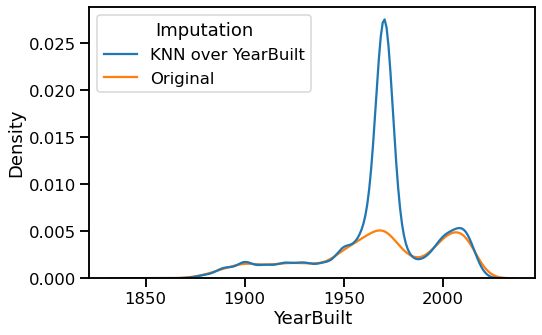

In [243]:
mice_year_built = melb_data_mice.YearBuilt.to_frame()
mice_year_built['Imputation'] = 'KNN over YearBuilt'
melb_year_build = melb_df.YearBuilt.dropna().to_frame()
melb_year_build['Imputation'] = 'Original'
data = pandas.concat([mice_year_built, melb_year_build])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data, x='YearBuilt', hue='Imputation')

Notar que cambia el grafico respecto a como esta planteado el ejercicio originalmente. En nuestro caso, nosotos tomamos todas las feaetures de tipo numerico para que se haga la estimacion de YearBuilt y BuildingArea. Como esta planteado en el práctico, se toman unicamente YearBuilt y BuildingArea para hacer la estimación de los valores faltantes. 

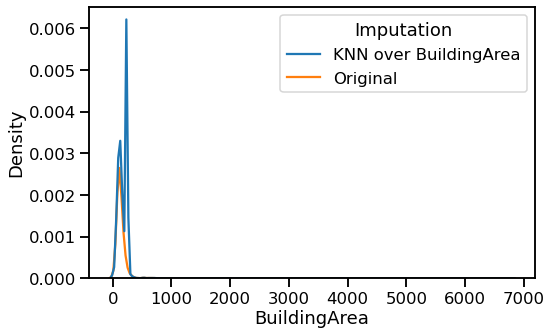

In [244]:
mice_year_built_area = melb_data_mice.BuildingArea.to_frame()
mice_year_built_area['Imputation'] = 'KNN over BuildingArea'
melb_year_build_area = melb_df.BuildingArea.dropna().to_frame()
melb_year_build_area['Imputation'] = 'Original'
data_area = pandas.concat([mice_year_built_area, melb_year_build_area])
fig = plt.figure(figsize=(8, 5))
g = seaborn.kdeplot(data=data_area, x='BuildingArea', hue='Imputation')

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [27]:
## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
categorical_cols = ['Type', 'Regionname']
numerical_cols = ['Rooms', 'Distance']
new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(melb_df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = numpy.hstack([X_cat, melb_df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = numpy.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pandas.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

KeyError: "None of [Index(['Type', 'Regionname'], dtype='object')] are in the [columns]"

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el año de construcción es previo a 1900

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Todas las características numéricas fueron estandarizadas.
  2. La columna `Suburb` fue imputada utilizando el método ...
  3. Las columnas `YearBuilt` y ... fueron imputadas utilizando el 
     algoritmo ...
  4. ...

  ### Datos aumentados
  1. Se agregan las 5 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


# Anexo Pruebas

https://www.youtube.com/watch?v=WPiYOS3qK70

In [52]:
test_df = pandas.DataFrame({
    'age' : [25,27,29,31,33,numpy.nan],
    'experiencie' : [numpy.nan, 3,5,7,9,11],
    'salary' : [50, numpy.nan, 110,140,170,200],
    'purchased' : [0,1,1,0,1,0]
    
    
})

test_df

,age,experiencie,salary,purchased
0,25.0,NaN,50.0,0
1,27.0,3.0,NaN,1
2,29.0,5.0,110.0,1
3,31.0,7.0,140.0,0
4,33.0,9.0,170.0,1
5,NaN,11.0,200.0,0


In [84]:
X = df.drop('purchased' , axis =1)

test_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor() , verbose= 10 , max_iter = 20 , n_nearest_features = 2 )


#test_imputer = IterativeImputer(random_state=0, estimator=KNeighborsRegressor(n_neighbors=5))
test_imputer.fit_transform(
    test_df[['age', 'experiencie' ]])

[IterativeImputer] Completing matrix with shape (6, 2)
[IterativeImputer] Ending imputation round 1/20, elapsed time 0.00
[IterativeImputer] Change: 0.0, scaled tolerance: 0.033 
[IterativeImputer] Early stopping criterion reached.


array([[25.,  7.],
       [27.,  3.],
       [29.,  5.],
       [31.,  7.],
       [33.,  9.],
       [29., 11.]])

In [54]:
test_df_1

array([[ 25.,   7.,  50.,   0.],
       [ 27.,   3., 134.,   1.],
       [ 29.,   5., 110.,   1.],
       [ 31.,   7., 140.,   0.],
       [ 33.,   9., 170.,   1.],
       [ 29.,  11., 200.,   0.]])

In [58]:
test_imputer1 = IterativeImputer(random_state=0, estimator=KNeighborsRegressor())
test_df_2 = mice_imputer.fit_transform(
    test_df['age'])

ValueError: Expected 2D array, got 1D array instead:
array=[25. 27. 29. 31. 33. nan].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()
imp = IterativeImputer(estimator = lr, verbose = 2, max_iter =1, tol=1e-10, imputation_order='roman')